## Introduction

The California housing market has long been a subject of interest to researchers, policymakers, and homeowners alike. Understanding the factors that influence house prices is crucial for making informed decisions about real estate investments and urban planning. This study aims to develop and compare multiple linear regression models to predict median house values in California.

Specifically, we will explore the relationship between median house values and three key features: median income, population, and number of households. By training and evaluating these models, we seek to identify the most significant factors influencing house prices and provide insights into the California housing market.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Obtaining the Data

Source: Downloaded from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

In [2]:
housing = pd.read_csv('./data/housing.csv')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Exploratory Data Analysis (EDA)

 An approach to analyzing data sets to summarize their main characteristics, often with visual methods.

**1. Explore statistics**

In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**2. Create three Seaborn scatter plots**

Text(0.5, 1.0, 'Median House Value vs. Median Income in California')

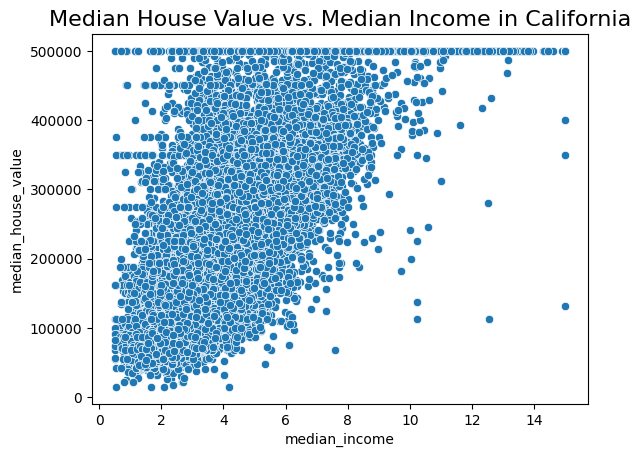

In [4]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing, )
plt.title("Median House Value vs. Median Income in California", fontsize=16)

- Positive correlation: Median house value and median income are positively correlated.
- Non-linearity: The relationship might be non-linear, especially at higher income levels.
- Outliers: Be mindful of outliers that might affect the model.
- Remove all data points where the house value exceeds 500,000

Text(0.5, 1.0, 'Median House Value vs. Population in California')

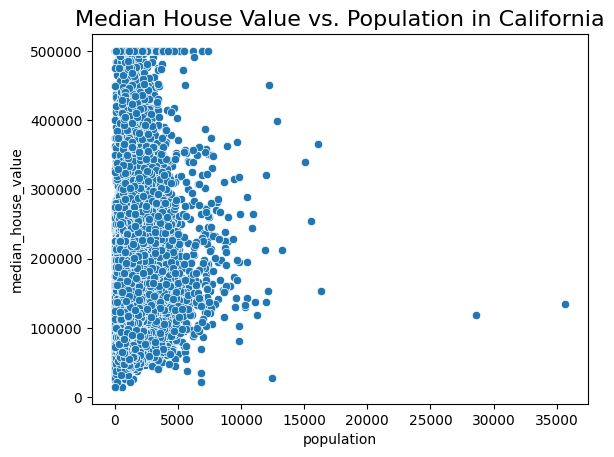

In [5]:
sns.scatterplot(x="population", y="median_house_value", data=housing, )
plt.title("Median House Value vs. Population in California", fontsize=16)

- Weak positive correlation: There's a weak positive correlation between median house value and population.
- Clustering: Data points cluster at lower population levels, with fewer points at higher populations.
- Outliers: A few outliers exist, especially at higher house values and lower populations.

Text(0.5, 1.0, 'Median House Value vs. households in California')

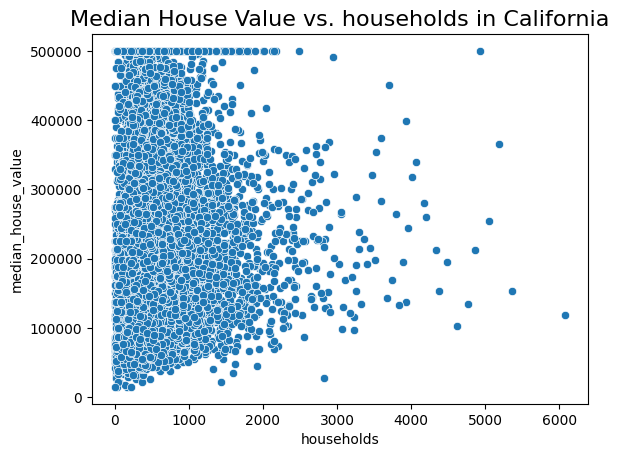

In [6]:
sns.scatterplot(x="households", y="median_house_value", data=housing, )
plt.title("Median House Value vs. households in California", fontsize=16)

Key Findings:

- Weak positive correlation: There's a weak positive correlation between median house value and households.
- Clustering: Data points cluster at lower household levels, with fewer points at higher households.
- Outliers: A few outliers exist, especially at higher house values and lower households.

Insights for Linear Regression:

- Simple linear regression: A basic linear model might be suitable due to the weak correlation.
- Non-linearity: Explore non-linear models or transformations if the relationship is non-linear.
- Outlier handling: Address outliers to improve model accuracy.
- Model evaluation: Use metrics like MSE, RMSE, and R-squared.

**3. Describe the 4 variables**
- 1. Median House Value:

Meaning: The average value of houses in a given area.
Range: Appears to range from 0 to around 500,000 (based on the plots).
Observations: The distribution is skewed right, with a concentration of values at the lower end and a few outliers at the higher end.
- 2. Median Income:

Meaning: The average income of households in a given area.
Range: Appears to range from 0 to around 15 (likely in units of thousands of dollars).
Observations: The distribution is skewed right, with a concentration of values at the lower end.
- 3. Population:

Meaning: The total number of people residing in a given area.
Range: Appears to range from 0 to around 35,000.
Observations: The distribution is skewed right, with a concentration of values at the lower end and a few outliers at the higher end.
- 4. Households:

Meaning: The number of households in a given area.
Range: Appears to range from 0 to around 6000.
Observations: The distribution is skewed right, with a concentration of values at the lower end.
Overall Observations:

All variables exhibit a skewed right distribution, indicating a concentration of values at the lower end and a few outliers at the higher end.
The range of each variable varies, reflecting different scales of measurement.
The relationships between these variables seem to be complex and may involve non-linear patterns or interactions.

**4. Run three linear regressions (fitting) between:**
- median house value vs. median income
- median house value vs. population
- median house value vs. number of households.

**Data Preprocessing**

Filter out records with median_house_value = 500001 since it seems to be a cap for the median_house_value.

In [7]:
housing_preprocessed = housing[housing.median_house_value != 500001]
print(f"After filtering, there are {len(housing_preprocessed)} records, versus {len(housing)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


**Train and Test Split**

Split the data into training/testing sets. 
Use the first 80% of the data for training.

In [8]:
train_size = int(len(housing_preprocessed)*0.8) 
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

Scatter plot, train in blue and test in red in the same plot

Text(0.5, 1.0, 'Median House Value vs. Median Income in California')

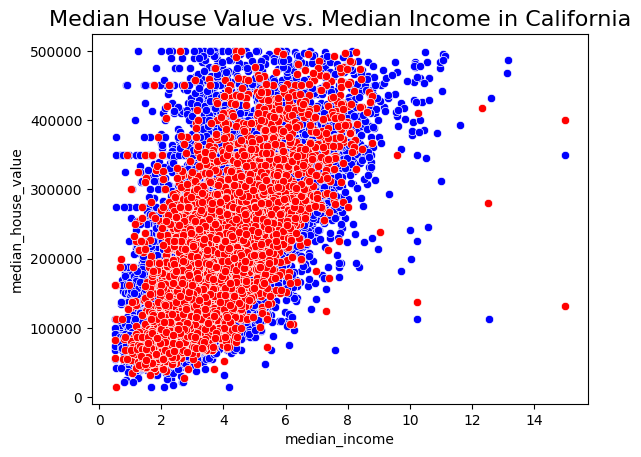

In [9]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")
plt.title("Median House Value vs. Median Income in California", fontsize=16)

Text(0.5, 1.0, 'Median House Value vs. Population in California')

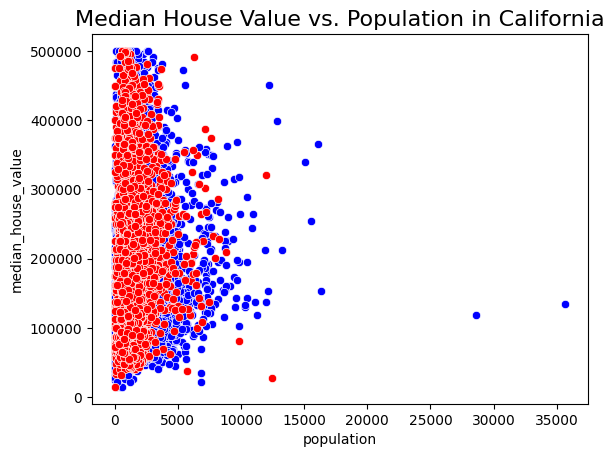

In [10]:
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")
plt.title("Median House Value vs. Population in California", fontsize=16)

Text(0.5, 1.0, 'Median House Value vs. Number of households in California')

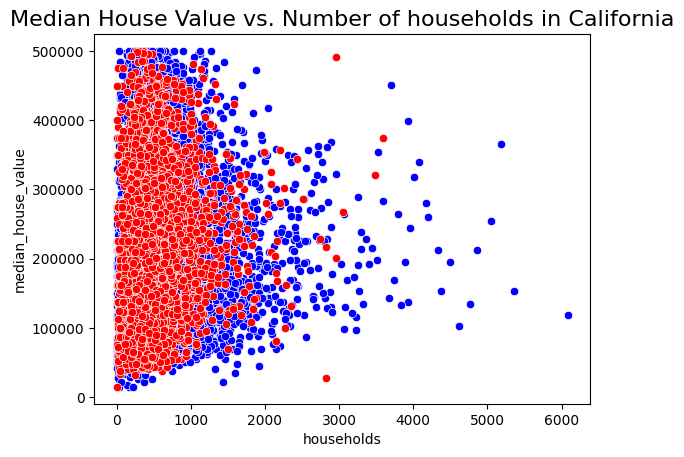

In [11]:
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")
plt.title("Median House Value vs. Number of households in California", fontsize=16)

**Define a Model**

Create a linear regression object

In [12]:
model_income = linear_model.LinearRegression()
model_population = linear_model.LinearRegression()
model_households = linear_model.LinearRegression()

**Train the Model**

In [13]:
# fit
model_income.fit(X=train[["median_income"]], y=train[["median_house_value"]])
model_population.fit(X=train[["population"]], y=train[["median_house_value"]])
model_households.fit(X=train[["households"]], y=train[["median_house_value"]])

LinearRegression()

**5.In a single table for all three linear regressions, provide per regression model：**

- intercept and slope 
- Mean Squared Error 
- Mean Absolute Error

In [14]:
import pandas as pd

#intercept
intercept_income = model_income.intercept_[0]
intercept_population = model_population.intercept_[0]
intercept_households = model_households.intercept_[0]
#slope
slope_income = model_income.coef_[0][0]
slope_population = model_population.coef_[0][0]
slope_households = model_households.coef_[0][0]

#predict

# Handle missing values (if necessary)
test = test.dropna()  # Remove rows with missing values

predict_income = model_income.predict(test[["median_income"]])
predict_population = model_population.predict(test[["population"]])
predict_household = model_households.predict(test[["households"]])
#MSE
mse_income = mean_squared_error(test[["median_income"]],predict_income)
mse_population = mean_squared_error(test[["population"]],predict_population)
mse_household = mean_squared_error(test[["households"]],predict_household)
#MAE
mae_income = mean_absolute_error(test[["median_income"]],predict_income)
mae_population = mean_absolute_error(test[["population"]],predict_population)
mae_household = mean_absolute_error(test[["households"]],predict_household)

# list
models = ['Model_income', 'Model_population', 'Model_household']
intercepts = [intercept_income, intercept_population, intercept_households]
slopes = [slope_income, slope_population, slope_households]
mses = [mse_income, mse_population, mse_household]
maes = [mae_income, mae_population, mae_household]

# create DataFrame
df = pd.DataFrame({'Model': models,
                   'Intercept': intercepts,
                   'Slope': slopes,
                   'MSE': mses,
                   'MAE': maes})
pd.set_option('display.float_format', '{:.2f}'.format)
#  DataFrame
df

,Model,Intercept,Slope,MSE,MAE
0,Model_income,48204.53,38702.97,42966066892.23,198248.83
1,Model_population,188081.59,0.33,35023759413.37,187145.12
2,Model_household,177147.29,22.63,35278274332.07,187686.86


**Plot the resulting line on top of the scatter data for each of the three models**


Text(0.5, 1.0, 'test data: Median House Value vs. Median Income in California')

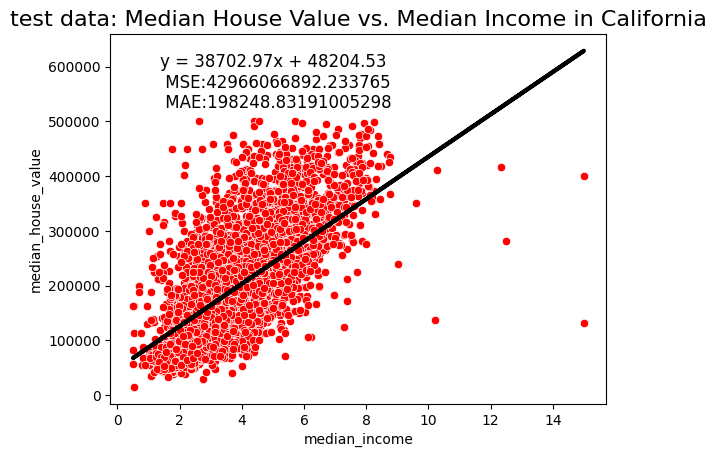

In [15]:
# plot the regression line against the test data
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")
plt.plot(test[["median_income"]], model_income.predict(test[["median_income"]]), color="black", linewidth=3)
plt.text(0.1, 0.95, f"y = {slope_income:.2f}x + {intercept_income:.2f} \n MSE:{mse_income} \n MAE:{mae_income}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.title("test data: Median House Value vs. Median Income in California", fontsize=16)

Text(0.5, 1.0, 'test data: Median House Value vs. population in California')

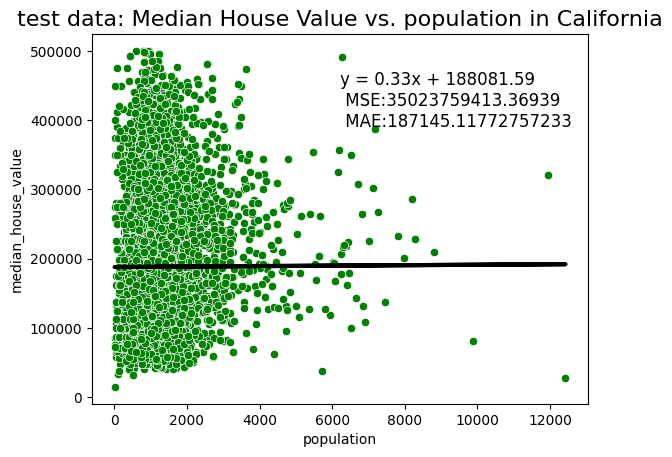

In [16]:
# plot the regression line against the test data
sns.scatterplot(x="population", y="median_house_value", data=test, color="green")
plt.plot(test[["population"]], model_population.predict(test[["population"]]), color="black", linewidth=3)
plt.text(0.5, 0.9, f"y = {slope_population:.2f}x + {intercept_population:.2f} \n MSE:{mse_population} \n MAE:{mae_population}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.title("test data: Median House Value vs. population in California", fontsize=16)

Text(0.5, 1.0, 'test data: Median House Value vs. households in California')

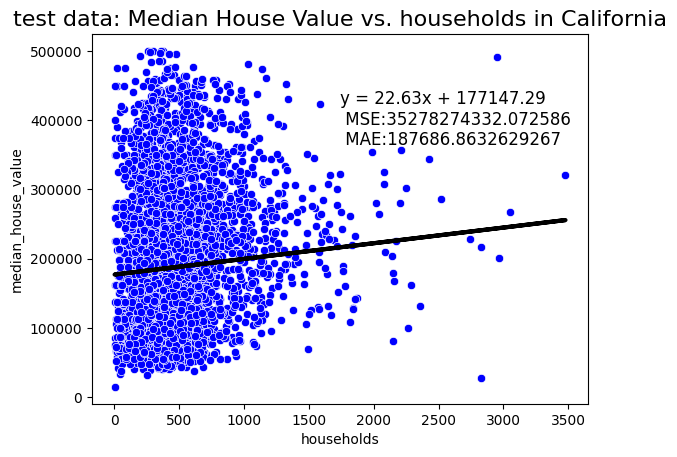

In [17]:
# plot the regression line against the test data
sns.scatterplot(x="households", y="median_house_value", data=test, color="blue")
plt.plot(test[["households"]], model_households.predict(test[["households"]]), color="black", linewidth=3)
plt.text(0.5, 0.85, f"y = {slope_households:.2f}x + {intercept_households:.2f} \n MSE:{mse_household} \n MAE:{mae_household}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.title("test data: Median House Value vs. households in California", fontsize=16)

## Conclusion

Based on the analysis of the three linear regression models, median income appears to be the most significant factor influencing median house value in California. Model_income, which uses median income as the predictor, has the highest slope and the lowest MSE, indicating a strong positive correlation between median income and house value. While both population and household numbers also have a positive impact on house value, their effects are less pronounced compared to median income

To improve the model's predictive power, consider incorporating additional features. Additionally, exploring non-linear relationships between features and the target variable might yield better results.